<a href="https://colab.research.google.com/github/ceyxasm/ml/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**LINEAR REGRESSION**

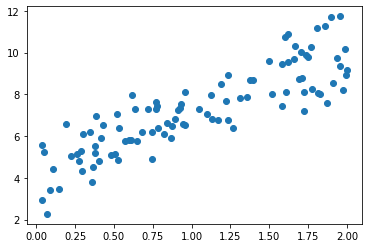

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X,y)
plt.show()

In [3]:
## compute θ using the Normal Equation from scratch
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.31087203]
 [2.84472729]]


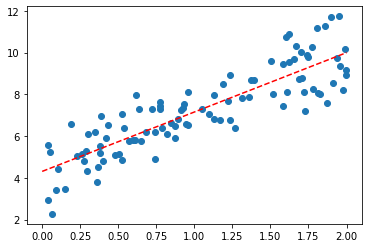

In [4]:
X_new= np.array([[0],[2]])
X_new_b= np.c_[np.ones((2,1)), X_new]
Y_pred= X_new_b.dot(theta_best)
plt.plot(X_new, Y_pred, 'r--')
plt.scatter(X,y)
plt.show()

In [5]:
## Using Scikit lib
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_, "\n")

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

# This function computes θ = X + y, where � + is the pseudoinverse of X (specifically the
# Moore-Penrose inverse).

[4.31087203] [[2.84472729]] 

[[4.31087203]
 [2.84472729]]


In [6]:
## Using Batch Gradient Descent
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

print(theta)

[[4.31087203]
 [2.84472729]]


In [7]:
## Stochastic Gradient Descent

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

print(theta)

[[4.3324361 ]
 [2.84669712]]


In [8]:
## Inbuilt SGD

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.3065297] [2.8528907]


Even better what works is a Mini-Batch GD
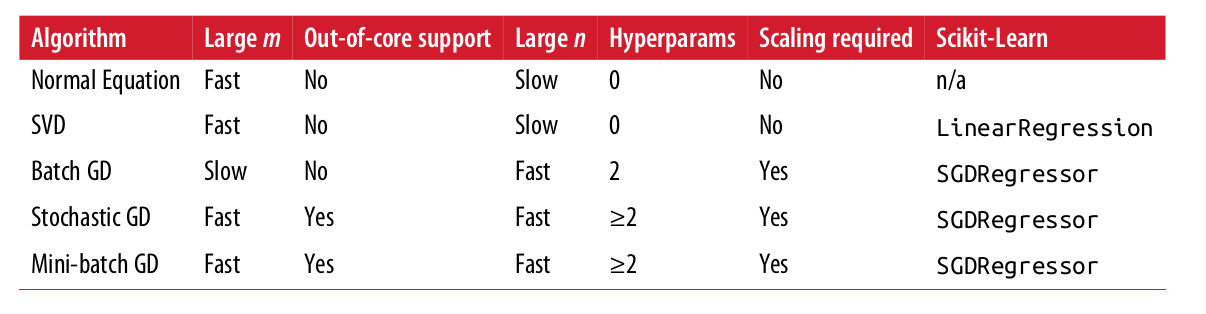



**POLYNOMIAL REGRESSION**

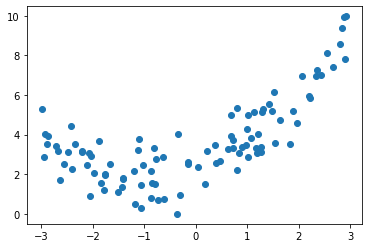

In [9]:
## preparing our non-linear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y)
plt.show()

In [10]:
## Assumption: fit will be quadratic
X_2= X**2
X_poly=np.c_[X, X_2]

lin_reg_a = LinearRegression()
lin_reg_a.fit(X_poly, y)
print(lin_reg_a.intercept_, lin_reg_a.coef_)

[2.32118684] [[0.90386046 0.47084877]]


[2.32118684] [[0.90386046 0.47084877]]


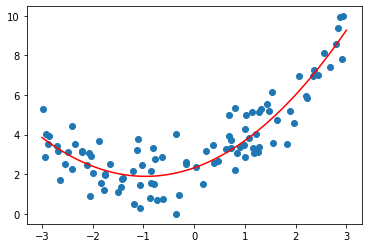

In [15]:
## this works well because we are the ones that made the model and know its construct
## for a feature matrix [[x1, x2, x3]...]-> quadratic terms can also be x1x2, x1x3, x2x3 which we have not included in our feature matrix

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

## in this procedure, there is no difference as x1, x2, x3 are single featured
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

## care to be taken as if N(n,d) will yield C(n+1, d)
X_plot=np.linspace(-3, 3, 1000)
Y_plot= X_plot*lin_reg.coef_[0][0] + lin_reg.coef_[0][1]*(X_plot**2)+ lin_reg.intercept_[0]


fig, ax = plt.subplots()
ax.plot(X_plot, Y_plot, 'r-')
plt.scatter(X, y)
plt.show()

**LEARNING CURVES**

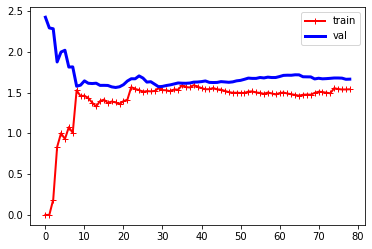

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.legend(['train', 'val'])

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.show()

If your model is underfitting the training data, adding more train‐
ing examples will not help. You need to use a more complex model
or come up with better features.

Training error starts of as low as with less features, fitting is almost accurate.
But for validation; model has barely learned and everything is random before it actually starts learning

Error at the end is quite high: 2
and we conclude the model to have underfit

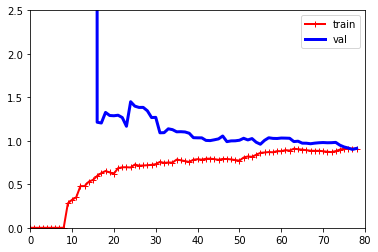

In [21]:
## now lets plot learning curve of 7 degree poly model

from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=8, include_bias=False)),
        ("lin_reg", LinearRegression()),
        ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 2.5])
plt.show()

The learnings have not plateaued, which is a good sign but there is a considerable gap bw train and val indicating overfitting to an extent

One way to improve an overfitting model is to feed it more training
data until the validation error reaches the training error.

Increasing a model’s complexity will typically increase its variance and reduce its bias.
Conversely, reducing a model’s complexity increases its bias and reduces its variance.
This is why it is called a tradeoff.

**REGULARIZATION**

So when should you use plain Linear Regression (i.e., without any regularization),
Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of
regularization, so generally you should avoid plain Linear Regression. Ridge is a good
default, but if you suspect that only a few features are actually useful, you should pre‐
fer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to
zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso
may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.

In [23]:
## Kernel for Elastic_net

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print(elastic_net.coef_, elastic_net.intercept_)

[0.78292324] [3.71013968]


**EARLY STOPPING**

In [ ]:
## Yet another approach will be early stopping
from sklearn.base import clone # prepare the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())
                        ])

#scaling
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
#preparing model that is bound to overfit
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

print('termination')

**LOGISTIC REGRESSION**

In [25]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())



['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [29]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

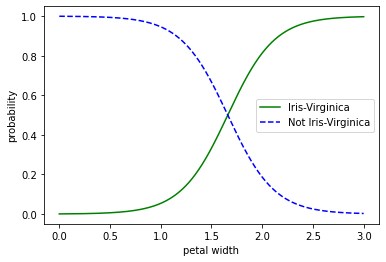

In [36]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend(['Iris-Virginica', 'Not Iris-Virginica'])
plt.xlabel('petal width')
plt.ylabel('probability')
plt.show()

**SOFTMAX REGRESSION**

here our target was binary. But The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers.



 The Softmax Regression classifier predicts only one class at a time
(i.e., it is multiclass, not multioutput) so it should be used only with
mutually exclusive classes such as different types of plants. You
cannot use it to recognize multiple people in one picture.

In [37]:
X = iris["data"][:, (2, 3)] #learning on 2 features
y = iris["target"] #all three classes to be considered

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)


# The hyperparameter controlling the regularization strength of a
# Scikit-Learn LogisticRegression model is not alpha (as in other
# linear models), but its inverse: C . The higher the value of C , the less
# the model is regularized.

print(softmax_reg.predict_proba([[5, 2]]))

[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


In [ ]:
## so according to our model, an Iris with 5cm long and 2cm wide petal is Iris-Virginica with 94.25% probability